<a href="https://colab.research.google.com/github/soulayman-al-abdallah/TimeSeries-OilPrice-Analysis/blob/main/2_Prophet_Oil_price_TS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oil Price Time series data analysis and modeling.

Data downloaded from [here](https://github.com/soulayman-al-abdallah/public-repo.git)

Steps applied:
- Data Cleaning
- Data Visualizing
- Prophet Model fitting, forecasting and evaluating





---



# Importing and Cleaning data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing

import statsmodels.tsa.api as smt    #statsmodel : imp pandas package #tsa : time series analysis

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import chisquare
import itertools
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!pip install pmdarima

In [ ]:
!git clone https://github.com/soulayman-al-abdallah/public-repo.git

Cloning into 'public-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 5.82 MiB | 4.05 MiB/s, done.


In [ ]:
df = pd.read_csv('/content/public-repo/BrentOilPrice.csv').drop(['Unnamed: 0'],axis=1)
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
7636,2017-06-20,43.98
7637,2017-06-21,44.62
7638,2017-06-22,44.46
7639,2017-06-23,44.14


In [ ]:
# Converting Date column to a datetime data type
df["Date"] = pd.to_datetime(df['Date']) 
df.head(3)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [ ]:
df.tail(3)

,Date,Price,Year,Month
7638,2017-06-22,44.46,2017,6
7639,2017-06-23,44.14,2017,6
7640,2017-06-26,44.09,2017,6


In [ ]:
# Get the shape of the dataset
print(df.shape)
# Statistical characteristics of the dataset
print(df.describe())

(7641, 2)
             Price
count  7641.000000
mean     44.875166
std      33.383360
min       9.100000
25%      18.500000
50%      28.460000
75%      64.700000
max     143.950000


In [ ]:
# To check if the data contains any null value
print(df.isnull().sum()) 

Date     0
Price    0
dtype: int64




---



#Visualizing data

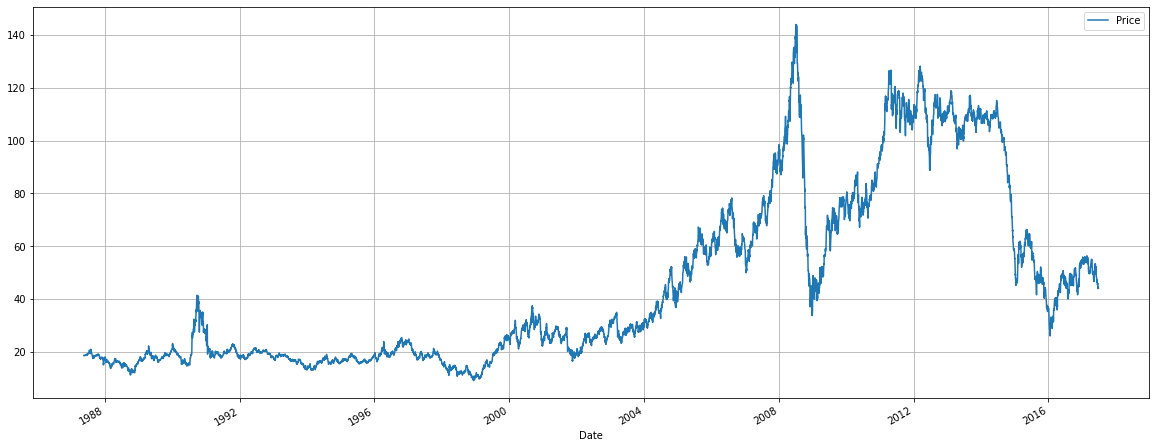

In [ ]:
df.plot(x='Date' , y='Price', figsize=(20,8), grid=True)

In [ ]:
# Creating a column with month and year values extracted from the date column that was converted to datetime data type

df["Year"] = pd.to_datetime(df["Date"]).dt.year 
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df.head(3)

,Date,Price,Year,Month
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5


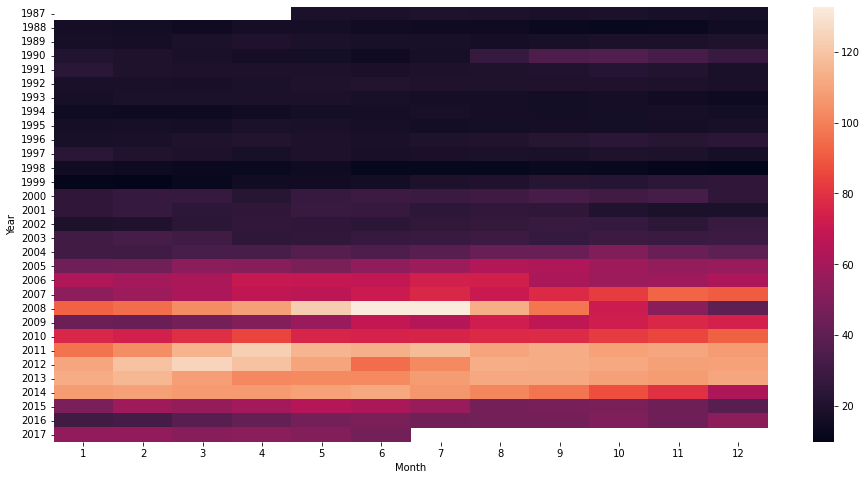

In [ ]:
# Plotting the heat map
plot = df.pivot_table('Price', 'Year', 'Month')
heatMap = sns.heatmap(plot)



---



# Prophet Modeling

Prophet by Facebook as an algorithm for the in-house prediction of time series values. Specifically designed for the prediction of business time series applications.

Additive model of multiple components:

yt = g(t) + s(t) + h(t) + εt

- g(t): represents the trend, to capture the general trend of the series
- s(t): represents the seasonality, to model the seasonal trend (seasonal ads)
- h(t): represents the cycle (holidays)
- εt: represents the error term, the random fluctuations that cannot be explained by the model, but assumed normally distributed of mean zero and variance calculated

In [ ]:
df.head(3)

,Date,Price,Year,Month
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5


In [ ]:
!pip install prophet
from prophet import Prophet
%matplotlib inline

In [ ]:
df_pr = df.drop(['Year','Month'], axis=1)
df_pr.head(3)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [ ]:
df_pr['Date'] = pd.to_datetime(df_pr['Date'])
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7641 non-null   datetime64[ns]
 1   Price   7641 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 119.5 KB


In [ ]:
df_pr = df_pr.rename(columns={'Date':'ds','Price':'y'})
df_pr.head(3)

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [ ]:
oilPrice = df_pr['y'] 
oilPrice.head(3)

0    18.63
1    18.45
2    18.55
Name: y, dtype: float64

In [ ]:
df_pr['y'] = np.log(df_pr['y'])
df_pr.head(3)

,ds,y
0,1987-05-20,2.924773
1,1987-05-21,2.915064
2,1987-05-22,2.920470


##Building and fitting

In [ ]:
OilPriceModel= Prophet()
OilPriceModel.fit(df_pr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwpflzjll/ssno0y3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwpflzjll/he47ib5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71215', 'data', 'file=/tmp/tmpwpflzjll/ssno0y3n.json', 'init=/tmp/tmpwpflzjll/he47ib5u.json', 'output', 'file=/tmp/tmpwpflzjll/prophet_model23jo1v2n/prophet_model-20230109104301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
FutureOilPrice = OilPriceModel.make_future_dataframe(periods=1065)
FutureOilPrice.tail()

,ds
8701,2020-05-22
8702,2020-05-23
8703,2020-05-24
8704,2020-05-25
8705,2020-05-26


In [ ]:
ForecastOilPrice = OilPriceModel.predict(FutureOilPrice)
ForecastOilPrice[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8701,2020-05-22,3.206550,2.068792,4.243344
8702,2020-05-23,3.180133,2.072692,4.205050
8703,2020-05-24,3.179621,2.056007,4.232707
8704,2020-05-25,3.206378,2.056084,4.245286
8705,2020-05-26,3.202138,2.086824,4.284444


<Figure size 1296x432 with 0 Axes>

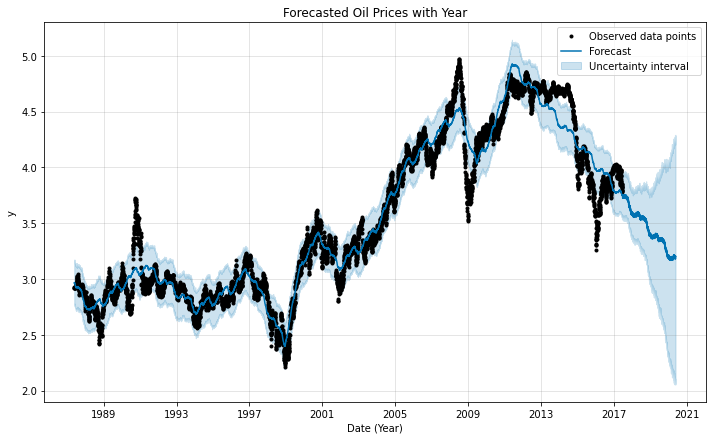

In [ ]:
plt.figure(figsize=(18, 6))
OilPriceModel.plot(ForecastOilPrice, xlabel = 'Date (Year)')
plt.title('Forecasted Oil Prices with Year');
plt.legend(loc='best')

##Model Components

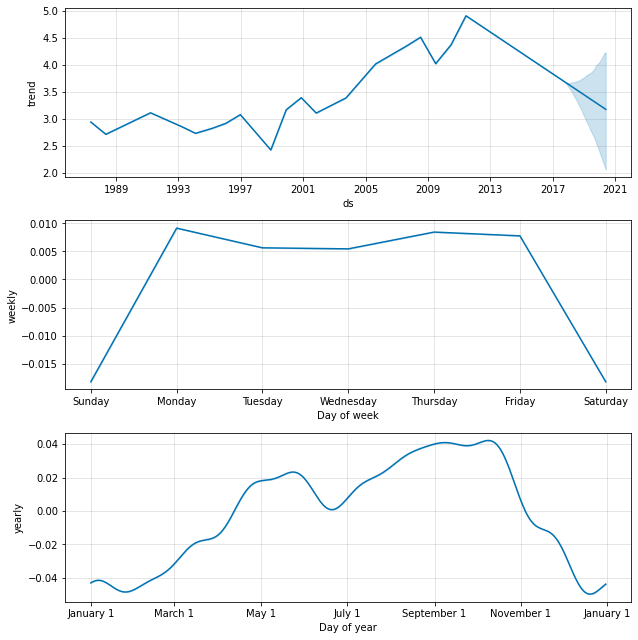

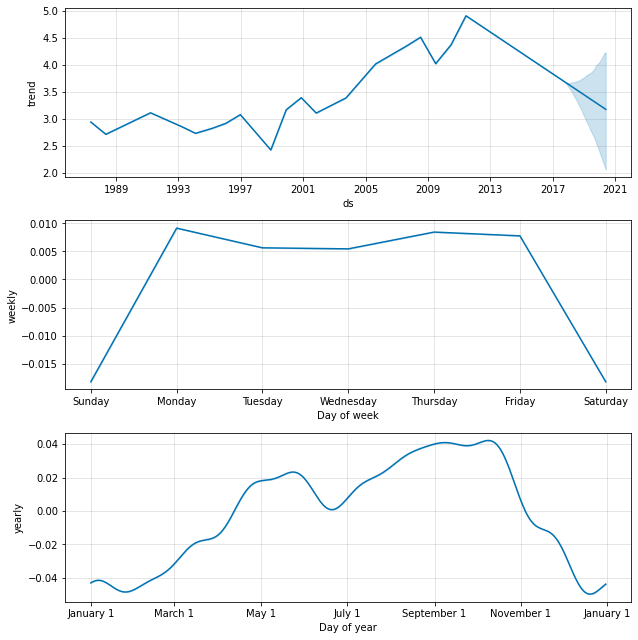

In [ ]:
OilPriceModel.plot_components(ForecastOilPrice)

##Evaluation

In [ ]:
from prophet.diagnostics import cross_validation

cv_results = cross_validation(OilPriceModel, initial = '140 days', period = '420 days', horizon = '130 days')

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,14 days,0.075008,0.273877,0.186429,0.050880,0.032989,0.050144,0.475262
1,15 days,0.076804,0.277135,0.189106,0.051713,0.036003,0.050945,0.457256
2,18 days,0.077329,0.278082,0.190963,0.052354,0.036707,0.051625,0.438495
3,19 days,0.080850,0.284341,0.195671,0.053800,0.038110,0.052996,0.418767
4,20 days,0.084372,0.290469,0.200056,0.055197,0.038172,0.054295,0.402188


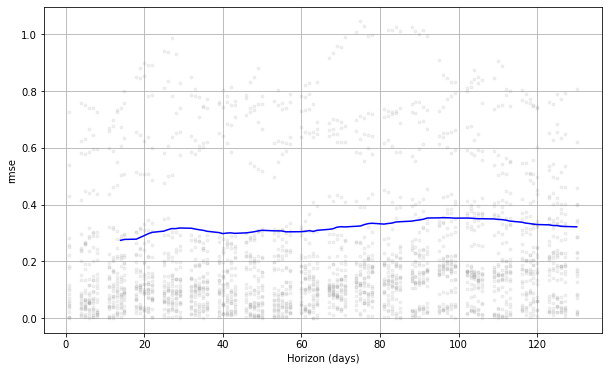

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric = 'rmse')